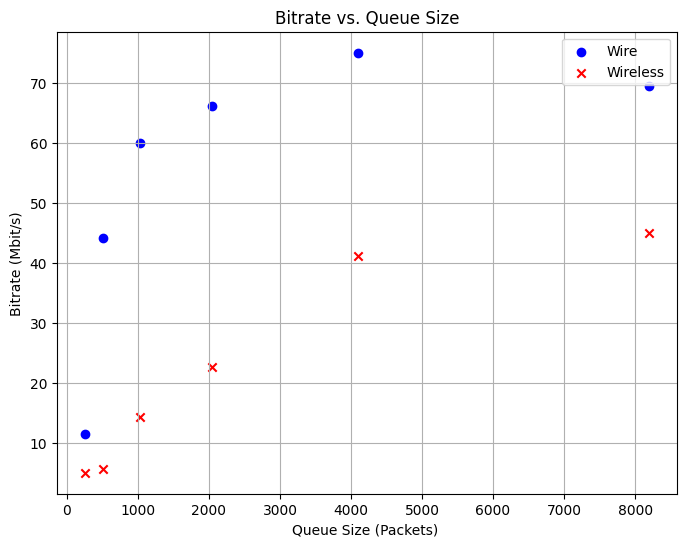

In [58]:
import os
import matplotlib.pyplot as plt

# Specify the log directory
log_dir = "problem1"
log1_dir = os.path.join(log_dir, "wire")
log2_dir = os.path.join(log_dir, "wireless")

# Initialize lists to store Bitrate and Queue Size values for both directories
bitrate_values_wire = []
queue_sizes_wire = []
bitrate_values_wireless = []
queue_sizes_wireless = []

# Loop through all log files in log1_dir (wire)
for filename in os.listdir(log1_dir):
    if filename.endswith(".log"):
        log_file = os.path.join(log1_dir, filename)

        # Read data from the log file
        with open(log_file, "r") as file:
            for line in file:
                if "Bitrate:" in line and "queue size:" in line:
                    # Split the line by spaces to extract Bitrate and Queue Size values
                    parts = line.split()
                    bitrate = int(parts[2])  # Extract Bitrate value from the line (assuming it's an integer)
                    bitrate_values_wire.append(bitrate)
                    queue_size = float(parts[4])  # Extract Queue Size value as a float
                    queue_sizes_wire.append(queue_size)

# Loop through all log files in log2_dir (wireless)
for filename in os.listdir(log2_dir):
    if filename.endswith(".log"):
        log_file = os.path.join(log2_dir, filename)

        # Read data from the log file
        with open(log_file, "r") as file:
            for line in file:
                if "Bitrate:" in line and "queue size:" in line:
                    # Split the line by spaces to extract Bitrate and Queue Size values
                    parts = line.split()
                    bitrate = int(parts[2])  # Extract Bitrate value from the line (assuming it's an integer)
                    bitrate_values_wireless.append(bitrate)
                    queue_size = float(parts[4])  # Extract Queue Size value as a float
                    queue_sizes_wireless.append(queue_size)

# Create a figure
plt.figure(figsize=(8, 6))

# Scatter plot for wire data
plt.scatter(bitrate_values_wire,queue_sizes_wire, marker='o', color='b', label='Wire')

# Scatter plot for wireless data
plt.scatter(bitrate_values_wireless,queue_sizes_wireless, marker='x', color='r', label='Wireless')

plt.xlabel('Queue Size (Packets) ')
plt.ylabel('Bitrate (Mbit/s)')
plt.title('Bitrate vs. Queue Size')
plt.grid(True)
plt.legend()

# Show or save the plot (you can choose to save it if needed)
plt.show()


# read json


In [1]:
import json
import os

# Get the current directory
# Get the current directory
current_directory = os.getcwd()

# List all files in the current directory
all_files = os.listdir(current_directory)
# Filter JSON files
json_files = [filename for filename in all_files if filename.endswith('.json')]

# Iterate through JSON files
for input_filename in json_files:
    # Create the corresponding output log file name
    output_filename = os.path.splitext(input_filename)[0] + '.log'

    try:
        with open(input_filename, 'r') as json_file, open(output_filename, 'w') as log_file:
            data = json.load(json_file)

            # Here, you can extract and process the data as needed
            # For example, to extract and write the "mean_rtt" value from the JSON:
            end_data = data.get("end", {})
            sender_data = end_data.get("streams", [{}])[0].get("sender", {})
            mean_rtt = sender_data.get("mean_rtt", None)

            if mean_rtt is not None:
                log_file.write(f"queue size: {int(input_filename[:-5])} Mean RTT: {mean_rtt}\n")

            print(f"Data from '{input_filename}' has been processed and saved to '{output_filename}'")

    except Exception as e:
        print(f"An error occurred while processing '{input_filename}': {str(e)}")


Data from '512.json' has been processed and saved to '512.log'
Data from '1024.json' has been processed and saved to '1024.log'
Data from '8192.json' has been processed and saved to '8192.log'
Data from '2048.json' has been processed and saved to '2048.log'
Data from '256.json' has been processed and saved to '256.log'
Data from '4096.json' has been processed and saved to '4096.log'


# Problem2
plot delay vs congestion window size

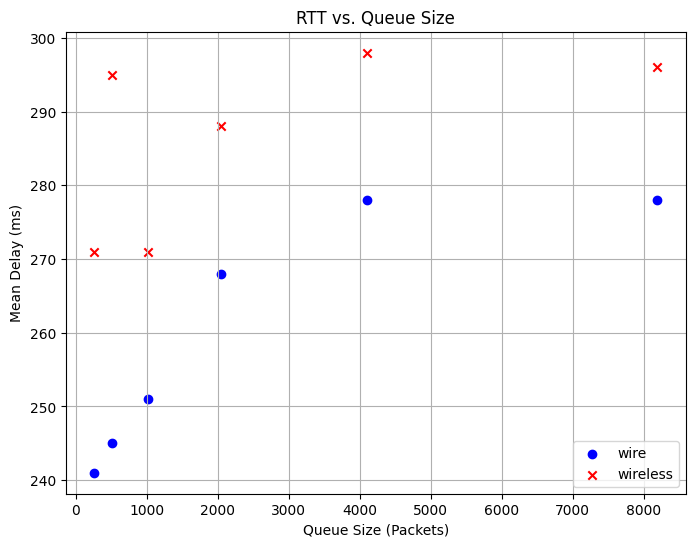

In [59]:
import os
import matplotlib.pyplot as plt

# Specify the directories containing log files
log_dirs = ["problem2/wire/", "problem2/wireless/"]

# Initialize lists to store RTT and Queue Size values for each dataset
rtt_values_list = []
queue_sizes_list = []

# Specify colors for each dataset
colors = ['b', 'r']  # Two colors for log1 wire and log2 wireless
markers = ['o', 'x']  # Markers for log1 wire and log2 wireless
labels = ['wire', 'wireless']  # Labels for the datasets

# Loop through each directory
for i, log_dir in enumerate(log_dirs):
    rtt_values = []
    queue_sizes = []

    for filename in os.listdir(log_dir):
        if filename.endswith(".log"):
            log_file = os.path.join(log_dir, filename)

            # Read data from the log file
            with open(log_file, "r") as file:
                for line in file:
                    if "Mean RTT:" in line and "queue size:" in line:
                        # Split the line by spaces to extract RTT and Queue Size values
                        parts = line.split()
                        rtt = int(parts[5]) //10**3  # Extract RTT value from the line
                        rtt_values.append(rtt)
                        queue_size = int(parts[2])  # Extract Queue Size value
                        queue_sizes.append(queue_size)

    rtt_values_list.append(rtt_values)
    queue_sizes_list.append(queue_sizes)

# Create a single figure for both log1 wire and log2 wireless data
plt.figure(figsize=(8, 6))

for i in range(len(log_dirs)):
    plt.scatter(queue_sizes_list[i], rtt_values_list[i], marker=markers[i], color=colors[i], label=labels[i])

plt.xlabel('Queue Size (Packets)')
plt.ylabel('Mean Delay (ms)')
plt.title('RTT vs. Queue Size')
plt.grid(True)
plt.legend()

# Show or save the plot (you can choose to save it if needed)
plt.show()


# Problem3
read json


In [60]:
import os

# Specify the input and output directories
input_dir = "./problem2/wireless"
output_dir = "./problem3/wireless"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# List all files in the input directory with the .log extension
log_files = [filename for filename in os.listdir(input_dir) if filename.endswith('.log')]

# Loop through the log files in the input directory
for filename in log_files:
    input_file_path = os.path.join(input_dir, filename)
    output_file_path = os.path.join(output_dir, filename)

    with open(input_file_path, 'r') as input_file, open(output_file_path, 'w') as output_file:
        # Read the content from the input log file
        log_content = input_file.read()

        # Write the content to the corresponding output log file in the output directory
        output_file.write(log_content)

    print(f"File '{filename}' has been copied to '{output_dir}'")

print("All log files have been copied.")


File '8192.log' has been copied to './problem3/wireless'
File '256.log' has been copied to './problem3/wireless'
File '4096.log' has been copied to './problem3/wireless'
File '512.log' has been copied to './problem3/wireless'
File '2048.log' has been copied to './problem3/wireless'
File '1024.log' has been copied to './problem3/wireless'
All log files have been copied.


In [61]:
import os

# Specify the input and output directories
input_dir = "./problem1/wireless"
output_dir = "./problem3/wireless"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# List all files in the input directory with the .log extension
log_files = [filename for filename in os.listdir(input_dir) if filename.endswith('.log')]

# Loop through the log files in the input directory
for filename in log_files:
    input_file_path = os.path.join(input_dir, filename)

    with open(input_file_path, 'r') as input_file:
        # Read the first line from the input log file
        first_line = input_file.readline()

        # Check if the first line contains the expected format
        if "queue size:" in first_line and "Bitrate:" in first_line:
            # Extract the queue size from the first line
            parts = first_line.split()
            queue_size = parts[2]

            # Define the output file path based on the queue size
            output_file_path = os.path.join(output_dir, f"{queue_size}.log")

            with open(output_file_path, 'a') as output_file:
                # Write the first line to the corresponding output log file
                output_file.write(first_line)

            print(f"Appended first line of '{filename}' to '{queue_size}.log'")

print("Processing complete.")


Appended first line of '512_results.log' to '512.log'
Appended first line of '4096_results.log' to '4096.log'
Appended first line of '8192_results.log' to '8192.log'
Appended first line of '256_results.log' to '256.log'
Appended first line of '1024_results.log' to '1024.log'
Appended first line of '2048_results.log' to '2048.log'
Processing complete.


# plot two figure separately

## plot problem3

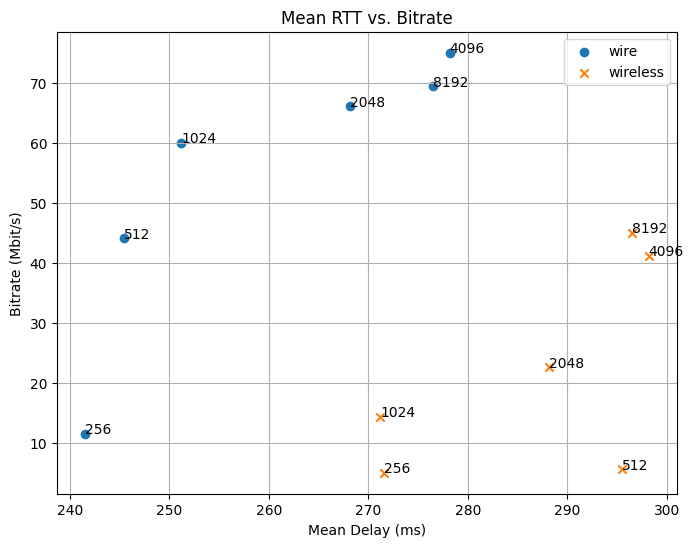

In [62]:
import os
import matplotlib.pyplot as plt

# Specify the directories containing log files
log_dir = "./problem3/wire"
log2_dir = "./problem3/wireless"

# Initialize lists to store data for both directories
rtt_values = []
bitrate_values = []
labels = []
markers = []  # To store markers for each data point

# List all files in the first log directory
log_files = [filename for filename in os.listdir(log_dir) if filename.endswith('.log')]

# Loop through the log files in the first directory
for filename in log_files:
    file_path = os.path.join(log_dir, filename)

    with open(file_path, 'r') as log_file:
        first_line = log_file.readline()
        second_line = log_file.readline()

        # Check if both lines contain Mean RTT and Bitrate information
        first_parts = first_line.split()
        second_parts = second_line.split()
        rtt = int(first_parts[5]) / 10**3  # Extract Mean RTT value
        bitrate = float(second_parts[4])  # Extract Bitrate value

        # Append data to the respective lists
        rtt_values.append(rtt)
        bitrate_values.append(bitrate)
        labels.append(filename[:-4])
        markers.append('o')  # Use 'o' marker for this directory

# List all files in the second log directory
log2_files = [filename for filename in os.listdir(log2_dir) if filename.endswith('.log')]

# Loop through the log files in the second directory
for filename in log2_files:
    file_path = os.path.join(log2_dir, filename)

    with open(file_path, 'r') as log_file:
        first_line = log_file.readline()
        second_line = log_file.readline()

        # Check if both lines contain Mean RTT and Bitrate information
        first_parts = first_line.split()
        second_parts = second_line.split()
        rtt = int(first_parts[5]) / 10**3  # Extract Mean RTT value
        bitrate = float(second_parts[4])  # Extract Bitrate value

        # Append data to the respective lists
        rtt_values.append(rtt)
        bitrate_values.append(bitrate)
        labels.append(filename[:-4])
        markers.append('x')  # Use 'x' marker for this directory

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Plot points from the first directory using 'o' marker
plt.scatter([rtt_values[i] for i, marker in enumerate(markers) if marker == 'o'],
            [bitrate_values[i] for i, marker in enumerate(markers) if marker == 'o'],
            marker='o', label='wire')

# Plot points from the second directory using 'x' marker
plt.scatter([rtt_values[i] for i, marker in enumerate(markers) if marker == 'x'],
            [bitrate_values[i] for i, marker in enumerate(markers) if marker == 'x'],
            marker='x', label='wireless')

plt.xlabel('Mean Delay (ms)')
plt.ylabel('Bitrate (Mbit/s)')
plt.title('Mean RTT vs. Bitrate')
plt.grid(True)
plt.legend()  # Show legend to differentiate markers

# Add labels to the points
for i, label in enumerate(labels):
    plt.annotate(label, (rtt_values[i], bitrate_values[i]))

plt.show()
